In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch
import os

In [2]:
np.random.seed(0)
y = np.arange(10) + np.random.normal(size=10)
x = np.arange(10)

yy = np.arange(10) + np.random.normal(loc=1, size=10)

y_avg = np.arange(10)
yy_avg = np.arange(10) + 1
x_avg = x

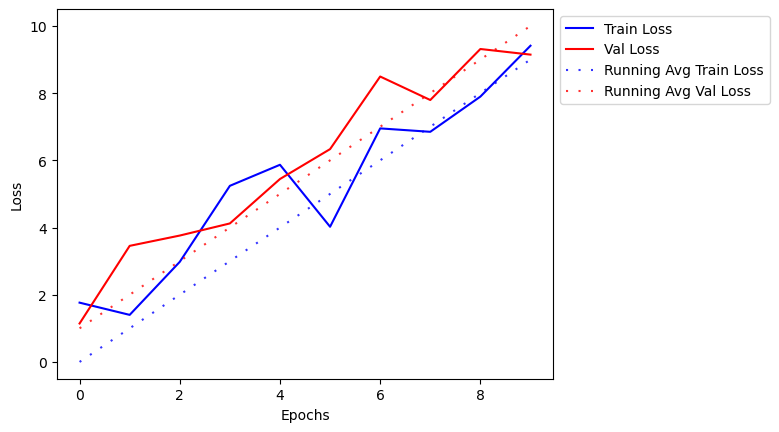

In [3]:
fig, ax = plt.subplots()

avg_style = {
    'linestyle': (0, (1, 5)), 
    'alpha': 0.8
}

ax.plot(x, y, color='blue', label='Train Loss')
ax.plot(x, yy, color='red', label='Val Loss')
ax.plot(x, y_avg, color='blue', label='Running Avg Train Loss', **avg_style)
ax.plot(x, yy_avg, color='red', label='Running Avg Val Loss', **avg_style)
ax.set(xlabel='Epochs', ylabel='Loss')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [39]:
with open('figure.pkl', 'wb') as f:
    pickle.dump(fig, f)

In [4]:
def plot_stats(mode, stat, train_stats, val_stats, checkpoint_dir):
    # subsetting train and val stats tensors to just losses or eval score
    train_stats_subset = None
    val_stats_subset = None
    if stat.lower() == 'loss':
        train_stats_subset = train_stats[:, [0, 1, 2]]
        val_stats_subset = val_stats[:, [0, 1, 2]]
    elif stat.lower() == 'score':
        train_stats_subset = train_stats[:, [0, 3, 4]]
        val_stats_subset = val_stats[:, [0, 3, 4]]
    else:
        raise Exception("stat argument can only be either 'loss' or 'score.'")
    
    # plotting figure
    fig, ax = plt.subplots()

    avg_style = {
        'linestyle': (0, (1, 5)), 
        'alpha': 0.8
    }
    stat = stat.capitalize()

    ax.plot(train_stats_subset[:, 0], train_stats_subset[:, 1], color='blue', label=f'Train {stat}')
    ax.plot(train_stats_subset[:, 0], train_stats_subset[:, 2], color='blue', 
            label=f'Running Avg Train {stat}', **avg_style)
    ax.plot(val_stats_subset[:, 0], val_stats_subset[:, 1], color='red', label=f'Val {stat}')
    ax.plot(val_stats_subset[:, 0], val_stats_subset[:, 2], color='red', 
            label=f'Running Avg Val {stat}', **avg_style)
    ax.set(xlabel='Iterations', ylabel=stat)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    file_name = os.path.join(checkpoint_dir, f'{mode.capitalize()}_{stat}_Plot')
    fig.savefig(f'{file_name}.png')
    with open(f'{file_name}.pkl', 'wb') as f:
        pickle.dump(fig, f)

In [5]:
train_stats = torch.from_numpy(np.vstack([x, y, y_avg]).T)
val_stats = torch.from_numpy(np.vstack([x, yy, yy_avg]).T)

In [6]:
os.getcwd()

'/home/bchau/Lab/kidney_seg/3D-UNet/notebooks'

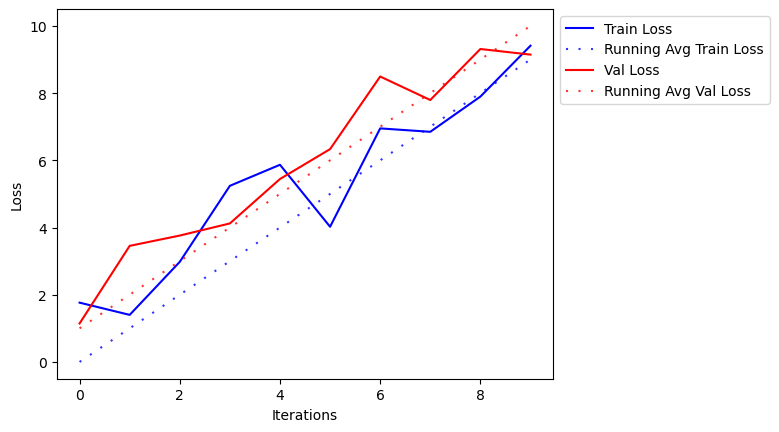

In [40]:
plot_stats('loss', train_stats, val_stats, '.')

# Testing Indexing Scores

In [7]:
train_stats = torch.zeros((10, 5))

In [9]:
train_stats[0,:] = torch.tensor([1, 2, 3, 4, 5])

In [10]:
train_stats

tensor([[1., 2., 3., 4., 5.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])